# **타이타닉 생존자 예측하기**


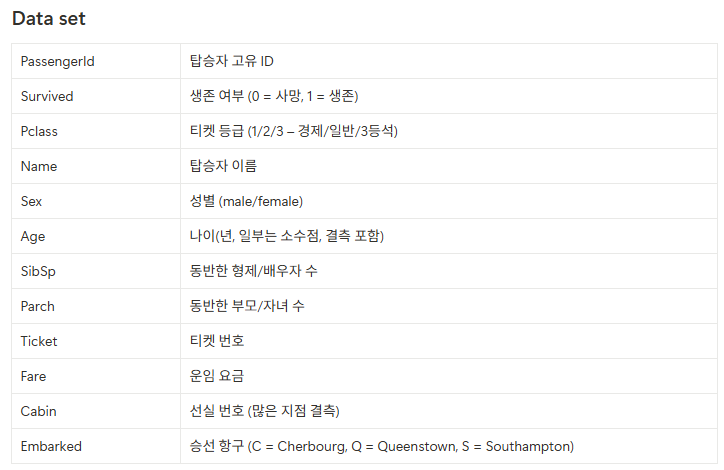
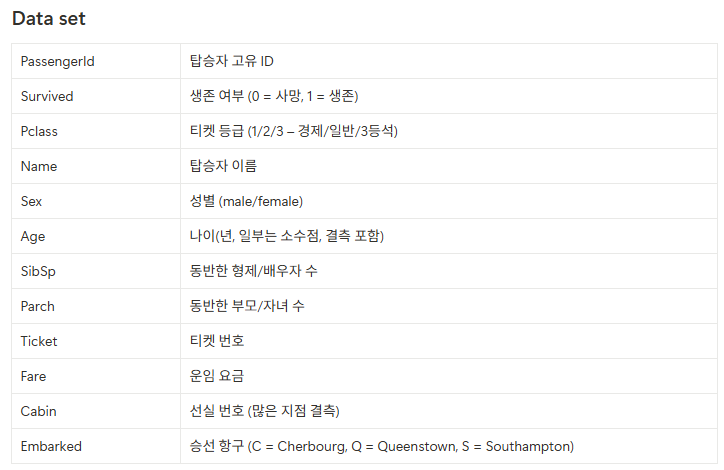

# **1. Data Load**

In [1]:
# 사용할 라이브러리 임포트
import numpy as np
import pandas as pd

In [2]:
# 데이터 로드
train_df = pd.read_csv('/kaggle/input/titanic/train.csv')
test_df = pd.read_csv('/kaggle/input/titanic/test.csv')
submission = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')

In [3]:
# 데이터 정보 확인해보기
train_df

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
test_df

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [5]:
# 시드 고정하기
import random
np.random.seed(42) # 넘파이용 시드 고정
random.seed(42) # 파이썬용 시드고정

# **2. EDA & Data Visualization**

In [6]:
# 데이터 크기 확인해보기
print(train_df.shape)
print(test_df.shape)

(891, 12)
(418, 11)


In [7]:
# 출력한도 정비하기 -> 50개로 제한해서 50개 다 볼 수 있도록
pd.set_option("display.max_columns",50)
pd.set_option("display.max_rows",50)

In [8]:
# 상위 10개 행&열 확인하기
train_df.head(10)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [9]:
test_df.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [10]:
# 데이터 타입 확인하기
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [11]:
# 수치형 데이터 통계
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [13]:
# 범주형 데이터 통계
train_df["Sex"].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [14]:
train_df["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [15]:
train_df["Cabin"].value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

In [16]:
# 결측치 수 확인하기
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [17]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [18]:
# 시각화를 위한 라이브러리 임포트
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
# 스타일 세팅
plt.style.use("ggplot")

In [20]:
# Embarked 생존률 확인하기
train_df[["Embarked","Survived","PassengerId"]]

,Embarked,Survived,PassengerId
0,S,0,1
1,C,1,2
2,S,1,3
3,S,1,4
4,S,0,5
...,...,...,...
886,S,0,887
887,S,1,888
888,S,0,889
889,C,1,890


In [21]:
# 결측값 삭제 및 그룹핑
embarked_df = train_df[["Embarked", "Survived", "PassengerId"]].dropna().groupby(["Embarked", "Survived"]).count().unstack()
embarked_df

PassengerId     
Survived           0    1
Embarked                 
C                 75   93
Q                 47   30
S                427  217

<Axes: xlabel='Embarked'>

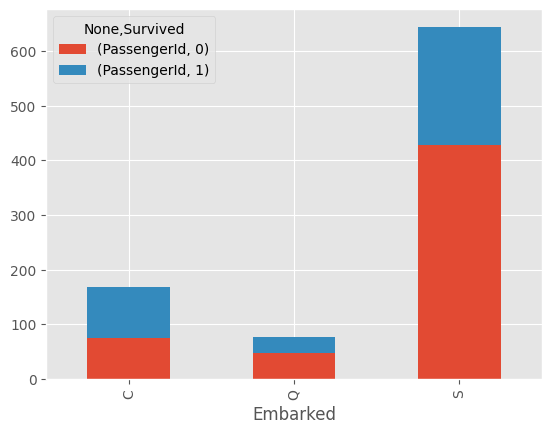

In [22]:
# 시각화하기
embarked_df.plot.bar(stacked=True)

In [23]:
# 생존률 구하기
embarked_df["survived_rate"] = embarked_df.iloc[:,1] / (embarked_df.iloc[:,0] + embarked_df.iloc[:,1])
embarked_df

PassengerId      survived_rate
Survived           0    1              
Embarked                               
C                 75   93      0.553571
Q                 47   30      0.389610
S                427  217      0.336957

<Axes: xlabel='Sex'>

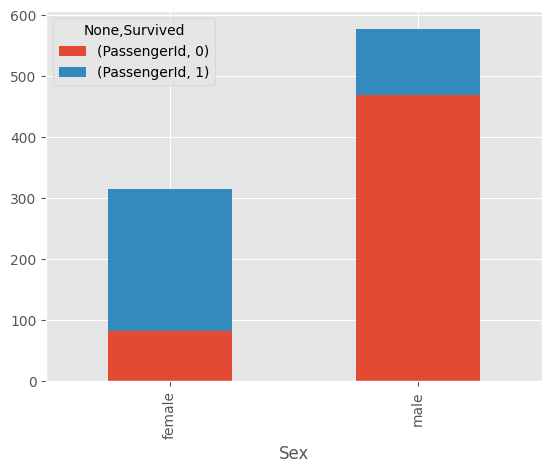

In [24]:
# Sex 생존률 확인하기
sex_df = train_df[["Sex", "Survived", "PassengerId"]].dropna().groupby(["Sex", "Survived"]).count().unstack()
sex_df.plot.bar(stacked=True)

In [25]:
# 생존률 구하기
sex_df["survived_rate"] = sex_df.iloc[:,1] / (sex_df.iloc[:,0] + sex_df.iloc[:,1])
sex_df

PassengerId      survived_rate
Survived           0    1              
Sex                                    
female            81  233      0.742038
male             468  109      0.188908

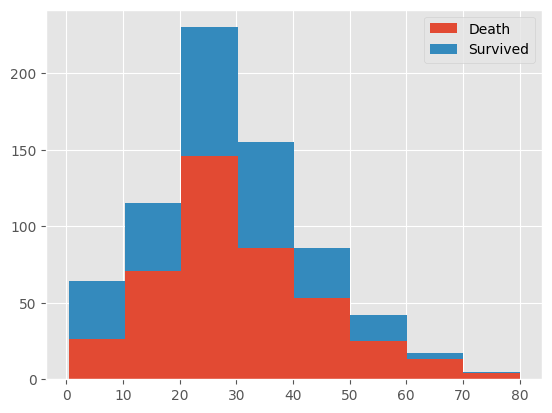

In [26]:
# Age 생존률 확인하기
plt.hist(x=[train_df.Age[train_df.Survived == 0], train_df.Age[train_df.Survived==1]], bins=8, histtype='barstacked', label=["Death", "Survived"])
plt.legend()

In [27]:
# 범주형 변수 -> 수치형 변수 변환
train_df_corr = pd.get_dummies(train_df,columns=["Sex"],drop_first=True) #sex열 원핫인코딩
train_df_corr = pd.get_dummies(train_df_corr, columns=["Embarked"]) #S,C,Q열 세개 만들기
cols = ["Sex_male", "Embarked_S", "Embarked_C", "Embarked_Q"]
train_df_corr[cols] = train_df_corr[cols].astype(int) # 명시적으로 0,1 변환

train_df_corr.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,1,0,0,1


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


<Axes: >

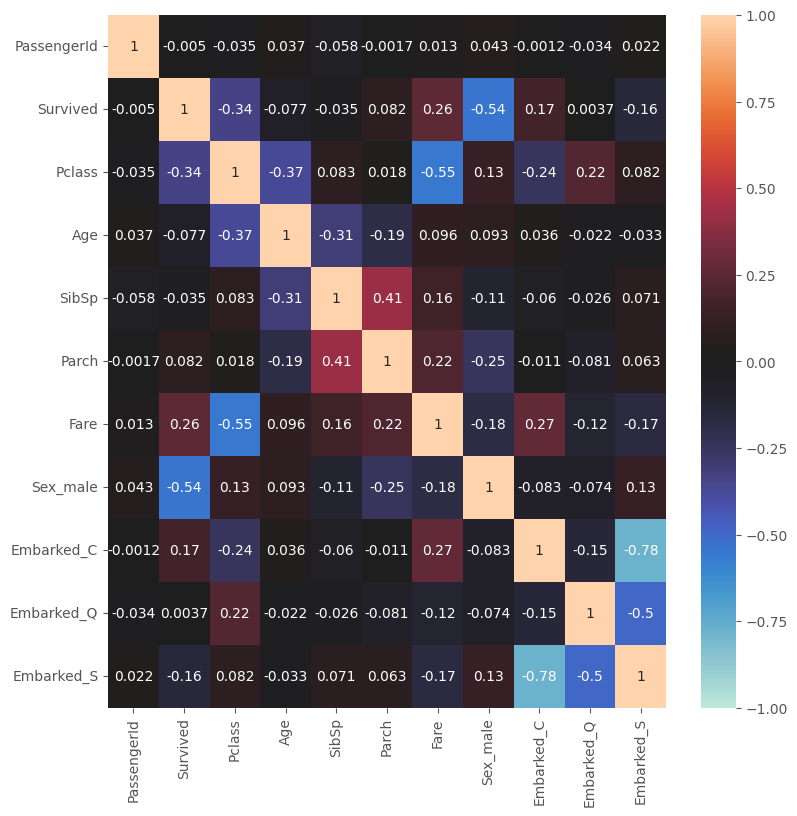

In [28]:
# 히트맵 시각화
train_corr = train_df_corr.select_dtypes(include=["number","bool"]).corr()
plt. figure(figsize=(9,9))
sns.heatmap(train_corr,vmax=1,vmin=-1,center=0,annot=True)

주요 상관관계 해석:  
Sex_male = -0.54 -> **남자일수록 생존률 낮음(여자가 더 생존)**  
Pclass = -0.34 -> **3등급일수록 생존률 낮음**  
Fare = +0.26 -> **비싼 요금일수록 생존률 높음(좋은선실)**  
Embarked_C = +0.17 -> **C항구에서 탄 사람이 더 생존함**  
Age = -0.07 -> 아주 약한 음의 상관 **(무시가능)**  

# **3. Data Preprocessing**

In [29]:
# train, test 데이터 합치기 -> 전처리 효율성 증가
all_df = pd.concat([train_df,test_df],sort=False).reset_index(drop=True)
all_df

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [30]:
# 결측치 확인하기
all_df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [31]:
# Fare 결측치 채우기

# 등급별로 평균 Fare계산
Fare_mean = all_df[["Pclass","Fare"]].groupby("Pclass").mean().reset_index()

# 열 이름 변경
Fare_mean.columns = ["Pclass","Fare_mean"]

# all_df에 평균값 병합
all_df = pd.merge(all_df, Fare_mean, on="Pclass", how="left")

# 결측값일 경우 평균으로 채우기
all_df.loc[(all_df["Fare"].isnull()),"Fare"] = all_df["Fare_mean"]

# 임시로 붙인 열 제거
all_df = all_df.drop("Fare_mean", axis=1)

# 검토하기
all_df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          2
dtype: int64

In [32]:
# 새로운 피처 만들기

# Name 데이터 확인
all_df["Name"].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

<U>*이름형식*</U>  
성, 호칭. 이름  
  
<U>*호칭정리*</U>   
Master : 남자아이  
Mr : 일반남성  
Miss : 미혼여성  
Mrs : 기혼여성  

In [33]:
# 형식 나누기
name_df = all_df["Name"].str.split("[,.]",n=2, expand=True)

# 이름 재정의
name_df.columns = ["family_name","honorific","name"]

# 공백제거
name_df["family_name"] = name_df["family_name"].str.strip()
name_df["honorific"] = name_df["honorific"].str.strip()
name_df["name"] = name_df["name"].str.strip()

name_df

,family_name,honorific,name
0,Braund,Mr,Owen Harris
1,Cumings,Mrs,John Bradley (Florence Briggs Thayer)
2,Heikkinen,Miss,Laina
3,Futrelle,Mrs,Jacques Heath (Lily May Peel)
4,Allen,Mr,William Henry
...,...,...,...
1304,Spector,Mr,Woolf
1305,Oliva y Ocana,Dona,Fermina
1306,Saether,Mr,Simon Sivertsen
1307,Ware,Mr,Frederick


In [34]:
# 호칭 개수 확인
name_df["honorific"].value_counts()

honorific
Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: count, dtype: int64

In [35]:
# 원래 열 옆에 붙이기 -> Age, Survived등 기존 열과 같이 분석 가능
all_df = pd.concat([all_df, name_df], axis=1)
all_df

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_name,honorific,name
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr,Owen Harris
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs,John Bradley (Florence Briggs Thayer)
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss,Laina
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs,Jacques Heath (Lily May Peel)
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr,William Henry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Spector,Mr,Woolf
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Oliva y Ocana,Dona,Fermina
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Saether,Mr,Simon Sivertsen
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,Ware,Mr,Frederick


<Axes: xlabel='honorific', ylabel='Age'>

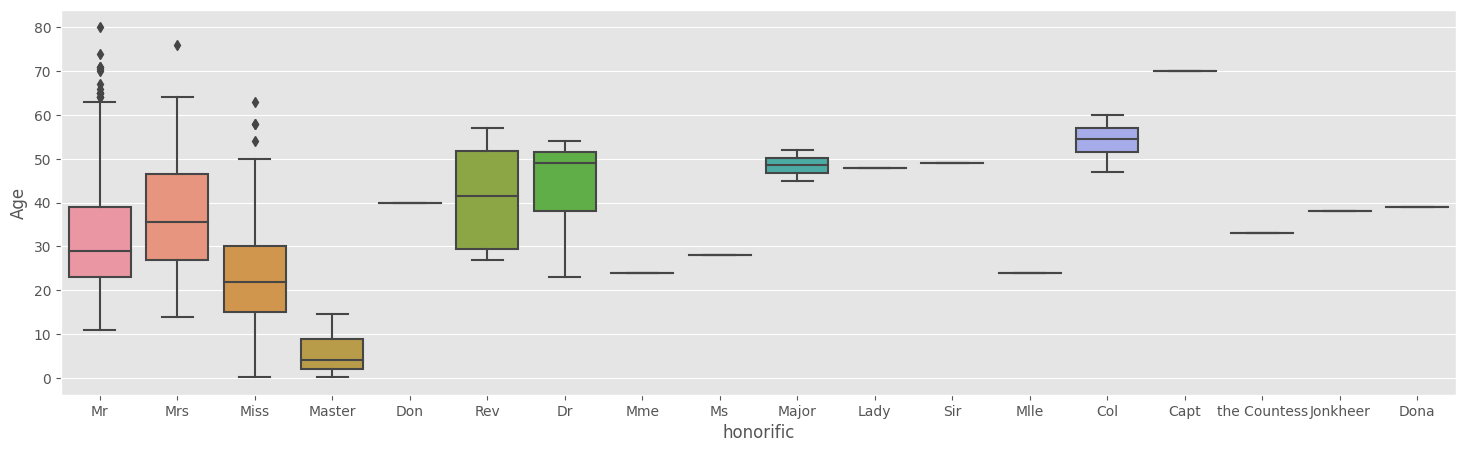

In [36]:
# 시각화 하기
# Data distribution
plt.figure(figsize=(18, 5))
sns.boxplot(x="honorific", y="Age", data=all_df)

<Axes: xlabel='honorific'>

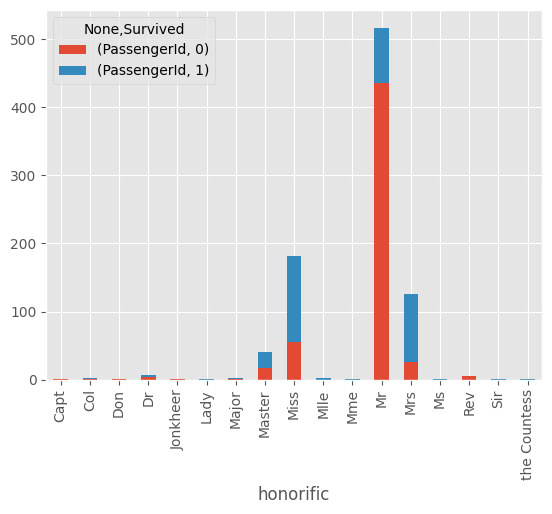

In [37]:
# 데이터 붙이기
train_df = pd.concat([train_df,name_df[0:len(train_df)].reset_index(drop=True)],axis=1)
test_df = pd.concat([test_df, name_df[len(train_df):]])

# 호칭별 생존자/사망자 수 시각화
honorific_df = train_df[["honorific","Survived","PassengerId"]].dropna().groupby(["honorific","Survived"]).count().unstack()
honorific_df.plot.bar(stacked=True)

In [38]:
# Age 결측치 채우기

# 호칭별 평균 나이 계산
honorific_age_mean = all_df[["honorific", "Age"]].groupby("honorific").mean().reset_index()

# 열이름 바꾸기
honorific_age_mean.columns = ["honorific", "honorific_Age"]

# 평균 나이를 all_df에 병합
all_df = pd.merge(all_df, honorific_age_mean, on="honorific", how="left")

# 결측치 채우기
all_df.loc[all_df["Age"].isnull(),"Age"] = all_df["honorific_Age"]

# 임시 열 제거
all_df = all_df.drop(["honorific_Age"],axis=1)

In [39]:
# 파생변수 만들기
all_df["family_num"] = all_df["Parch"] + all_df["SibSp"] #가족 수(본인제외)
all_df["family_num"].value_counts()

family_num
0     790
1     235
2     159
3      43
5      25
4      22
6      16
10     11
7       8
Name: count, dtype: int64

In [40]:
# 불필요한 변수 삭제 -> 학습에 의미 없는 변수들임
all_df = all_df.drop(["PassengerId","Name","family_name","name","Ticket","Cabin"],axis=1)
all_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,honorific,family_num
0,0.0,3,male,22.0,1,0,7.2500,S,Mr,1
1,1.0,1,female,38.0,1,0,71.2833,C,Mrs,1
2,1.0,3,female,26.0,0,0,7.9250,S,Miss,0
3,1.0,1,female,35.0,1,0,53.1000,S,Mrs,1
4,0.0,3,male,35.0,0,0,8.0500,S,Mr,0


In [41]:
# 범주형 변수만 추라기
categories = all_df.columns[all_df.dtypes=="object"]
print(categories)

Index(['Sex', 'Embarked', 'honorific'], dtype='object')


In [42]:
# 희귀호칭(Mr,Miss,Mrs,Master외)을 'other'로 통합
all_df.loc[~((all_df["honorific"] == "Mr") | 
             (all_df["honorific"] == "Miss") | 
             (all_df["honorific"] == "Mrs") | 
             (all_df["honorific"] == "Master")), "honorific"] = "other"


all_df.honorific.value_counts()

honorific
Mr        757
Miss      260
Mrs       197
Master     61
other      34
Name: count, dtype: int64

In [43]:
# 결측치 채우기
all_df["Embarked"].fillna("missing",inplace=True)
all_df.head()

/tmp/ipykernel_13/3315439486.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  all_df["Embarked"].fillna("missing",inplace=True)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,honorific,family_num
0,0.0,3,male,22.0,1,0,7.2500,S,Mr,1
1,1.0,1,female,38.0,1,0,71.2833,C,Mrs,1
2,1.0,3,female,26.0,0,0,7.9250,S,Miss,0
3,1.0,1,female,35.0,1,0,53.1000,S,Mrs,1
4,0.0,3,male,35.0,0,0,8.0500,S,Mr,0


In [44]:
# 라벨 인코딩
from sklearn.preprocessing import LabelEncoder

# 0/1로 치환
for cat in categories:
    le = LabelEncoder()
    print(cat)
    if all_df[cat].dtypes == "object":
        le = le.fit(all_df[cat])
        all_df[cat] = le.transform(all_df[cat])

all_df.head()

Sex
Embarked
honorific


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,honorific,family_num
0,0.0,3,1,22.0,1,0,7.2500,2,2,1
1,1.0,1,0,38.0,1,0,71.2833,0,3,1
2,1.0,3,0,26.0,0,0,7.9250,2,1,0
3,1.0,1,0,35.0,1,0,53.1000,2,3,1
4,0.0,3,1,35.0,0,0,8.0500,2,2,0


In [45]:
# 모델 학습을 위한 데이터셋 분리하기

# 학습용 입력 데이터(피쳐)
train_X = all_df[~all_df["Survived"].isnull()].drop("Survived", axis=1).reset_index(drop=True)

# 학습용 타깃(정답라벨)
train_Y = train_df["Survived"]

# 테스트 데이터(예측 대상)
test_X = all_df[all_df["Survived"].isnull()].drop("Survived", axis=1).reset_index(drop=True)

# **4. Modeling**

In [46]:
# lightGBM
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

In [47]:
# 데이터 셋 나눠주기(20%) -> 학습용/검증용
X_train, X_valid, y_train, y_valid = train_test_split(
    train_X,train_Y,test_size=0.2, random_state=42
)

In [48]:
# 데이터셋 객체 만들기
categories = ["Embarked","Pclass","Sex","honorific"]
lgb_train = lgb.Dataset(X_train, y_train, categorical_feature=categories)
lgb_eval = lgb.Dataset(X_valid,y_valid,categorical_feature=categories,reference=lgb_train)

In [49]:
# 하이퍼 파라미터 설정
lgbm_params = {
    "objective":"binary",
    "random_seed":42
}

In [50]:
# 모델 학습
model_lgb = lgb.train(lgbm_params, #하이퍼 파라미터 설정
                      lgb_train, # 학습용 데이터 셋
                      num_boost_round=100, # 트리 개수
                      valid_sets=[lgb_eval], # 검증용 데이터셋
                      callbacks=[
                          lgb.early_stopping(stopping_rounds=20), #20번 연속 성능 향상 없으면
                          lgb.log_evaluation(period=10) #로그를 10회마다 출력
                      ]
)

[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002174 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 214
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 20 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Wa

In [51]:
# 피쳐 중요도 확인하기
model_lgb.feature_importance()

array([ 58,  28, 293,  16,  12, 384,  45,  10,  49], dtype=int32)

<Axes: >

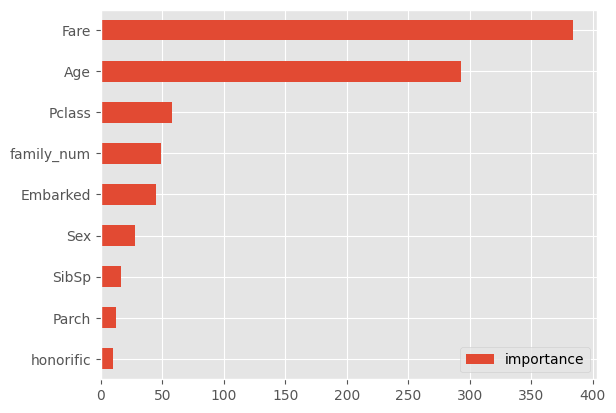

In [52]:
#시각화하기
importance = pd.DataFrame(
    model_lgb.feature_importance(),
    index=X_train.columns,
    columns=["importance"]
).sort_values(by="importance", ascending=True)

importance.plot.barh()


# **5. Model Evaluation**

In [53]:
# 정확도 평가하기
from sklearn.metrics import accuracy_score
y_pred = model_lgb.predict(X_valid, num_iteration=model_lgb.best_iteration) #예측값 생성
accuracy_score(y_valid, np.round(y_pred)) #정확도 게산

0.8268156424581006

In [54]:
# 하이퍼파라미터 설정 -> 모델 최적화
lgbm_params = {
    "objective":"binary",
    "learning_rate":"0.05",
    "random_seed":42
}

In [55]:
# 재학습
lgb_train = lgb.Dataset(X_train, y_train, categorical_feature = categories)
lgb_eval = lgb.Dataset(X_valid, y_valid, categorical_feature=categories, reference=lgb_train)

# 모델 재학습
model_lgb = lgb.train(lgbm_params,
                     lgb_train,
                     num_boost_round=100,
                     valid_sets=[lgb_eval],
                     callbacks=[
                         lgb.early_stopping(stopping_rounds=20),
                         lgb.log_evaluation(period=10)
                     ]
)

# 피쳐 중요도 재확인
model_lgb.feature_importance()

[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000119 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 214
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 20 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Wa

array([113,  53, 644,  34,  25, 845, 114,  23,  91], dtype=int32)

<Axes: >

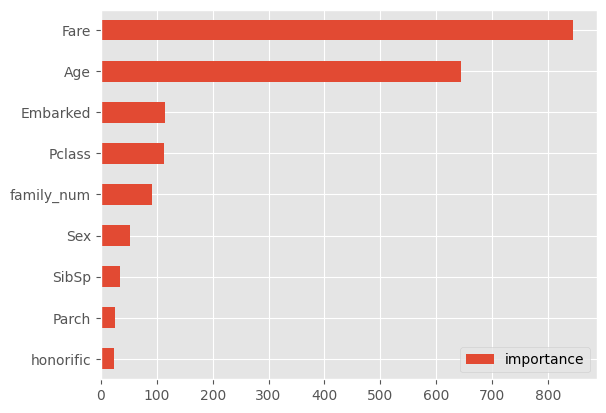

In [56]:
# 피쳐중요도 시각화
importance  = pd.DataFrame(model_lgb.feature_importance(), index=X_train.columns, columns=["importance"]).sort_values(by="importance",ascending=True)
importance.plot.barh()

In [57]:
# 정확도 재평가
y_pred = model_lgb.predict(X_valid, num_iteration=model_lgb.best_iteration)
accuracy_score(y_valid, np.round(y_pred))

0.8268156424581006

In [58]:
# 교차검증 실행 (k-fold)
folds = 3
kf = KFold(n_splits=folds)

In [59]:
# 정확도 저장
accuracy_list = []

# 교차검증모델 학습
models = []
for train_index, val_index in kf.split(train_X):
    X_train = train_X.iloc[train_index]
    X_valid = train_X.iloc[val_index]
    y_train = train_Y.iloc[train_index]
    y_valid = train_Y.iloc[val_index]

    lgb_train = lgb.Dataset(X_train, y_train, categorical_feature=categories)
    lgb_eval = lgb.Dataset(X_valid, y_valid, categorical_feature=categories, reference=lgb_train)

    model_lgb = lgb.train(
        lgbm_params,
        lgb_train,
        num_boost_round=100,
        valid_sets=[lgb_eval],
        callbacks=[
            lgb.early_stopping(stopping_rounds=20),
            lgb.log_evaluation(period=10)
        ]
    )

    y_pred = model_lgb.predict(X_valid, num_iteration=model_lgb.best_iteration)
    acc = accuracy_score(y_valid, np.round(y_pred))
    print("Fold accuracy:", acc)
    accuracy_list.append(acc)

    models.append(model_lgb)

[LightGBM] [Info] Number of positive: 236, number of negative: 358
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000129 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 203
[LightGBM] [Info] Number of data points in the train set: 594, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.397306 -> initscore=-0.416701
[LightGBM] [Info] Start training from score -0.416701
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 20 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Wa

In [60]:
# 평균 정확도 출력
mean_accuracy = np.mean(accuracy_list)
print("Average Cross-Validation Accuracy:", mean_accuracy)

Average Cross-Validation Accuracy: 0.8282828282828283


In [61]:
# 예측 결과 저장
preds = []

for model in models:
    pred = model.predict(test_X)
    preds.append(pred)

# 평균 계산하기 
preds_array = np.array(preds)
preds_mean = np.mean(preds_array, axis=0)

# 0/1로 변환하기
preds_int = (preds_mean > 0.5).astype(int)

# **6. Submission**

In [62]:
# 제출파일 만들기
submission["Survived"] = preds_int
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [63]:
# csv파일로 저장
submission.to_csv("titanic_submit01.csv", index=False)